## Algorithm Evaluation: Which algorithm is resulting in the best scores

## Step 1 - Read the Dataset 

In [36]:
from warnings import filterwarnings
filterwarnings('ignore')

In [37]:
import pandas as pd
df = pd.read_csv(r'D:\Machine-Learning\repository\Algorithem Evalaution\train_loan.csv')
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [39]:
df.shape

(58645, 13)

In [40]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [41]:
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [42]:
df.duplicated().sum()

0

## There are no missing values nor any duplicated rows in this dataset

## Separate X and Y for model building
    Y - target feature => Loan status 
    0 => not approved
    1 => approved

In [43]:
X = df.drop(columns=["id","loan_status"])
Y = df[["loan_status"]]

In [44]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [45]:
Y.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


In [46]:
Y.value_counts()

loan_status
0              50295
1               8350
Name: count, dtype: int64

<Axes: xlabel='loan_status'>

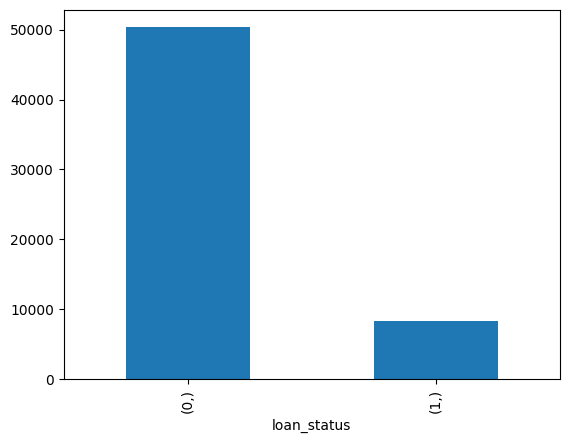

In [47]:
Y.value_counts().plot(kind='bar')

## Data preprocessing and data cleaning

In [48]:
cat = list(X.columns[X.dtypes=="object"])
con = list(X.columns[X.dtypes!="object"])

In [49]:
cat

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [50]:
con

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [51]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [52]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore',sparse_output=False)
)

In [53]:
num_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)

In [54]:
pre = ColumnTransformer([
    ('cat',cat_pipe,cat),
    ('con',num_pipe,con)
]
).set_output(transform='pandas')

In [55]:
X_pre = pre.fit_transform(X)
X_pre.head()

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298


## Divide the  dataset into 2 categories: training data and testing data

In [56]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.8,random_state=21)

In [57]:
xtrain.head()

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
49371,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.074446,-0.264855,0.075506,0.140632,0.926666,0.335502,1.039036
33104,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,-0.754307,-0.923845,0.580588,-0.758041,0.023767,0.117378,-0.698298
53030,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.571697,0.156966,-0.177035,0.931464,-0.253034,0.444564,0.790845
54909,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.091305,-0.370311,-0.177035,-0.578306,1.091428,-0.427932,0.294464
27249,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.571697,-0.370311,0.075506,0.050765,-0.009185,0.335502,0.294464


In [58]:
xtest.head()

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
40062,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,0.288785,0.328047,1.039305,-0.921970,0.444564,-0.698298
30128,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-1.085808,-0.818495,0.075506,-1.117510,0.267616,-0.755118,-0.946489
34643,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.731951,1.475156,-0.429576,1.039305,1.124381,-0.318870,2.031798
39635,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,-0.422806,1.527884,-1.187200,0.500101,-1.116389,-0.646056,-0.450108
32787,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-1.085808,-1.055770,-0.682117,0.140632,2.172270,2.843926,-0.698298


In [59]:
ytrain.head()

,loan_status
49371,0
33104,1
53030,0
54909,0
27249,0


In [60]:
ytest.head()

,loan_status
40062,0
30128,0
34643,0
39635,0
32787,1


## Algorithm Evaluation

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [ ]:
# %pip install xgboost

### Restart and run all the cells

In [62]:
from xgboost import XGBClassifier

In [63]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
]

In [64]:
models[0]

LogisticRegression()

In [65]:
type(models[0])

sklearn.linear_model._logistic.LogisticRegression

In [66]:
type(models[0]).__name__

'LogisticRegression'

In [67]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [68]:
def evaluate_model_performance(model,xtrain,ytrain,xtest,ytest):
    # Fit the model
    model.fit(xtrain,ytrain)

    # Predict the results for train and test
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)

    # Calculate f1-score metric for the model
    f1_data_train = f1_score(ytrain,ypred_train,average="macro")
    f1_data_test = f1_score(ytest,ypred_test,average="macro")

    # cross validated scores
    scores = cross_val_score(model,xtrain,ytrain,scoring="f1_macro",cv=5)
    f1_cv = scores.mean()

    # Return the metric scores
    results = {
        "name":type(model).__name__,
        "f1_train":f1_data_train,
        "f1_test":f1_data_test,
        "f1_cv":f1_cv
    }

    return results

In [69]:
def evaluate_models(models,xtrain,ytrain,xtest,ytest):
    res = []
    for model in models:
        r = evaluate_model_performance(model,xtrain,ytrain,xtest,ytest)
        print(r)
        res.append(r)

    # convert the results into a dataframe
    results_df = pd.DataFrame(res)

    # sort the values 
    results_df.sort_values(by="f1_cv",ascending=False,inplace=True)

    return results_df

In [70]:
models

[LogisticRegression(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 GradientBoostingClassifier(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
               n_jobs=None, num_parallel_tree=None, ...)]

In [71]:
xtrain

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
49371,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.074446,-0.264855,0.075506,0.140632,0.926666,0.335502,1.039036
33104,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,-0.754307,-0.923845,0.580588,-0.758041,0.023767,0.117378,-0.698298
53030,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.571697,0.156966,-0.177035,0.931464,-0.253034,0.444564,0.790845
54909,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.091305,-0.370311,-0.177035,-0.578306,1.091428,-0.427932,0.294464
27249,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.571697,-0.370311,0.075506,0.050765,-0.009185,0.335502,0.294464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16432,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,-0.422806,0.947880,1.085671,-0.758041,1.091428,-1.191366,-0.946489
8964,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.731951,1.369806,2.095835,1.219040,1.516515,-0.100746,2.776370
5944,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.068949,0.631514,-0.429576,0.679836,2.274423,-0.100746,-0.201917
5327,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-0.588556,0.367876,0.833130,1.937978,1.289143,1.098935,-0.698298


In [72]:
xtrain.values

array([[ 0.        ,  0.        ,  0.        , ...,  0.92666559,
         0.33550166,  1.03903592],
       [ 0.        ,  0.        ,  0.        , ...,  0.02376715,
         0.11737777, -0.69829813],
       [ 0.        ,  0.        ,  0.        , ..., -0.25303383,
         0.4445636 ,  0.79084535],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  2.27442275,
        -0.10074612, -0.20191697],
       [ 1.        ,  0.        ,  0.        , ...,  1.28914307,
         1.09893527, -0.69829813],
       [ 1.        ,  0.        ,  0.        , ...,  0.05012915,
        -0.64605585,  1.03903592]])

In [73]:
results_df_op = evaluate_models(models,xtrain.values,ytrain.values,xtest.values,ytest.values)

{'name': 'LogisticRegression', 'f1_train': 0.7896696325140371, 'f1_test': 0.7985965142034601, 'f1_cv': 0.7897604222303383}
{'name': 'DecisionTreeClassifier', 'f1_train': 1.0, 'f1_test': 0.8327127302944652, 'f1_cv': 0.8237704771435809}
{'name': 'RandomForestClassifier', 'f1_train': 0.9998689781813177, 'f1_test': 0.8909092168406472, 'f1_cv': 0.8877565561693952}
{'name': 'GradientBoostingClassifier', 'f1_train': 0.8879502716232552, 'f1_test': 0.8918090415220007, 'f1_cv': 0.8855196370951435}
{'name': 'XGBClassifier', 'f1_train': 0.9261415664592195, 'f1_test': 0.8953575534770736, 'f1_cv': 0.8911728973238981}


In [74]:
results_df_op

,name,f1_train,f1_test,f1_cv
4,XGBClassifier,0.926142,0.895358,0.891173
2,RandomForestClassifier,0.999869,0.890909,0.887757
3,GradientBoostingClassifier,0.887950,0.891809,0.885520
1,DecisionTreeClassifier,1.000000,0.832713,0.823770
0,LogisticRegression,0.789670,0.798597,0.789760


## XGBoost classifier is resulting in highest scores for crossvalidated metric

In [75]:
best_model = XGBClassifier()
best_model.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [76]:
best_model.score(xtrain,ytrain)

0.9665146218773979

In [77]:
best_model.score(xtest,ytest)

0.9528519055332936

## Model evaluation 

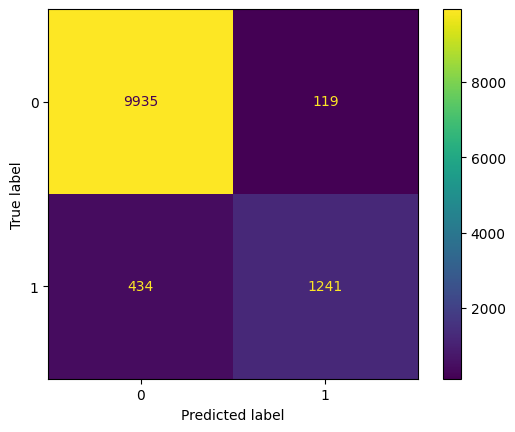

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model,xtest,ytest)

In [79]:
ypred_test = best_model.predict(xtest)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10054
           1       0.91      0.74      0.82      1675

    accuracy                           0.95     11729
   macro avg       0.94      0.86      0.90     11729
weighted avg       0.95      0.95      0.95     11729



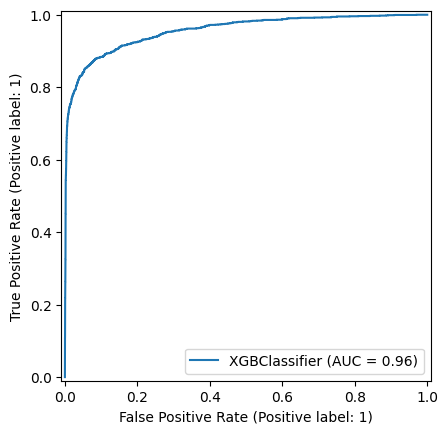

In [81]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_model,xtest,ytest)

## From above results, we can confidently consider xgboost model for out of sample predictions

In [82]:
xnew = pd.read_csv(r'D:\Machine-Learning\repository\Algorithem Evalaution\test_loan.csv')
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [83]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.754307,0.130602,-0.429576,2.836651,1.674687,2.189555,-0.946489
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,-0.257055,0.842425,0.328047,0.140632,0.659750,-0.646056,-0.450108
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-0.257055,-0.897587,0.075506,-0.937775,2.145908,-0.318870,-0.946489
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.903198,-0.370311,-0.177035,-0.398572,-0.585854,-0.209808,0.294464
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.257055,1.000608,0.833130,1.039305,1.859221,-0.100746,-0.450108


In [84]:
final_preds = best_model.predict(xnew_pre)
final_preds[:5]

array([1, 0, 1, 0, 0])

## Save the results to a dataframe

In [85]:
xnew["loan status_P"] = final_preds
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan status_P
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2,1
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4,0
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2,1
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7,0
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4,0


In [86]:
xnew.to_csv("Predicted Results.csv",index=False)